In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sys

sys.path.append('../')
from branchcut.exampleCreator import createExample, createUnwrappedBaseline
from branchcut.unwrap import *

In [3]:
def plot_cuts(ax, logical_array):
    """
    Plots lines corresponding to the cuts in a logical array. 
    Cuts are aligned with the left and lower edges of the pixels.

    Parameters:
    logical_array (numpy.ndarray): A 2D logical array where `True` indicates a cut.
    """
    rows, cols = logical_array.shape
    
    for r in range(rows):
        for c in range(cols):
            if logical_array[r, c]:

                if c + 1 < cols and r +1 < rows:
                    if not logical_array[r, c + 1] and not logical_array[r + 1, c]:
                        # Corner
                        continue

                if c + 1 < cols:
                    if not logical_array[r, c + 1]:
                        # Draw horizontal line (lower edge)
                        ax.plot([c+0.5, c+0.5], [r+0.5, r+0.5 + 1], 'k-', linewidth=5)

                if r +1 < rows:
                    if not logical_array[r + 1, c]:
                        # Draw vertical line (left edge)
                        ax.plot([c+0.5, c+0.5 + 1], [r+0.5, r+0.5], 'k-', linewidth=5)
    

# Plot for Report

In [4]:
ub = createUnwrappedBaseline((20,20),(0,8*np.pi))
up, wp = createExample(ub)
BC = np.zeros((20,20),dtype=bool)

BC[:15,4]=True
BC[5, 10:20]=True
BC[10,8:17]=True
BC[15:20,8]=True
BC[15,8:15]=True

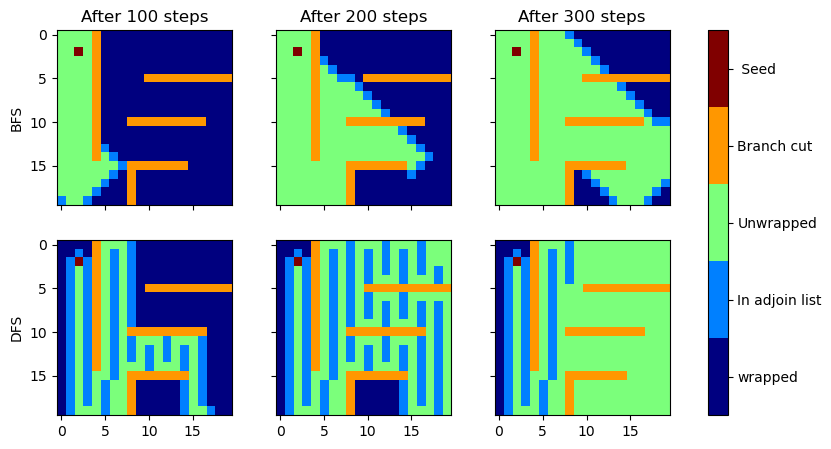

In [5]:
fig, ax = plt.subplots(2,3,figsize=(10,5),sharex=True,sharey=True)

seed = np.zeros((20,20),dtype=bool)
seed[2,2]=True
cmap = plt.get_cmap('jet', 5)

displayer = unWrapDisplayer(wp, seed=(2,2), branchCuts=BC, mode='bfs')
for a in range(3):
    for i in range(100):
        displayer.update()
    
    image = displayer.adjoin.astype(int) + displayer.unwrapped.astype(int)
    image[BC] = 3
    image[seed] = 4
    im = ax[0,a].imshow(image, vmin=-0.5,vmax=4.5,cmap=cmap)


displayer = unWrapDisplayer(wp, seed=(2,2), branchCuts=BC, mode='dfs')
for a in range(3):
    for i in range(100):
        displayer.update()
    
    image = displayer.adjoin.astype(int) + displayer.unwrapped.astype(int)
    image[BC] = 3
    image[seed] = 4    
    im = ax[1,a].imshow(image, vmin=-0.5,vmax=4.5,cmap=cmap)


cbar = fig.colorbar(im, ax=ax.ravel().tolist())
cbar.ax.locator_params(nbins=5)
cbar.set_ticks([0,1,2,3,4])
cbar.set_ticklabels(['wrapped', 'In adjoin list', 'Unwrapped', 'Branch cut', ' Seed'])

ax[0,0].set_ylabel('BFS')
ax[1,0].set_ylabel('DFS')
ax[0,0].set_title('After 100 steps')
ax[0,1].set_title('After 200 steps')
ax[0,2].set_title('After 300 steps')

plt.show()

# Animation

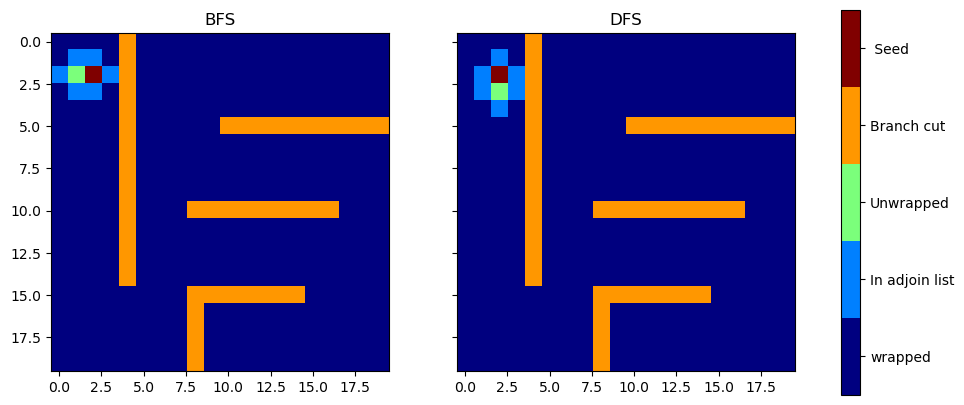

In [6]:
from IPython.display import display, clear_output
import matplotlib.animation as animation

seed = np.zeros((20,20),dtype=bool)
seed[2,2]=True
cmap = plt.get_cmap('jet', 5)

# initialize displayers
displayer_bfs = unWrapDisplayer(wp, seed=(2,2), branchCuts=BC, mode='bfs',unwrapBranchPixels=False)
displayer_dfs = unWrapDisplayer(wp, seed=(2,2), branchCuts=BC, mode='dfs',unwrapBranchPixels=False)

convergence1 = False
convergence2 = False
first = True

fig, ax = plt.subplots(1,2,figsize=(12,5),sharex=True,sharey=True)

image = displayer_bfs.adjoin.astype(int) + displayer_bfs.unwrapped.astype(int)
image[BC] = 3
image[seed] = 4
im_bfs = ax[0].imshow(image,vmin=-0.5,vmax=4.5,cmap=cmap, animated=True)
ax[0].set_title('BFS')

image = displayer_dfs.adjoin.astype(int) + displayer_dfs.unwrapped.astype(int)
image[BC] = 3
image[seed] = 4
im_dfs = ax[1].imshow(image,vmin=-0.5,vmax=4.5,cmap=cmap, animated=True)
ax[1].set_title('DFS')
cbar = fig.colorbar(im_dfs, ax=ax.tolist())
cbar.ax.locator_params(nbins=5)
cbar.set_ticks([0,1,2,3,4])
cbar.set_ticklabels(['wrapped', 'In adjoin list', 'Unwrapped', 'Branch cut', ' Seed'])


def update(i):
    c1 = displayer_bfs.update()
    image = displayer_bfs.adjoin.astype(int) + displayer_bfs.unwrapped.astype(int)
    image[BC] = 3
    image[seed] = 4
    im_bfs.set_array(image)

    c2 = displayer_dfs.update()
    image = displayer_dfs.adjoin.astype(int) + displayer_dfs.unwrapped.astype(int)
    image[BC] = 3
    image[seed] = 4
    im_dfs.set_array(image)    

    return im_bfs, im_dfs

animation_fig = animation.FuncAnimation(fig, update, frames=356, interval=25, blit=True,repeat_delay=10,)
plt.show()
animation_fig.save("animated_GMM.gif")
